## Import Packages

In [1]:
# Import Packages
#########################################################################################################################
import pandas as pd, numpy as np
from sqlalchemy import create_engine, MetaData, Table, select
import os, time
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/vishaal/Documents/GitHub/Imdbdataset/Data"]).decode("utf8"))

name.basics.tsv.gz
title.akas.tsv.gz
title.basics.tsv.gz
title.crew.tsv.gz
title.episode.tsv.gz
title.principals.tsv.gz
title.ratings.tsv.gz



## Importing Data

In [3]:
title_akas_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/title.akas.tsv.gz', nrows=100000000, compression='gzip',
                   error_bad_lines=False, sep='\t')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
title_basics_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/title.basics.tsv.gz', nrows=100000000, compression='gzip',
                   error_bad_lines=False, sep='\t')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
title_crew_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/title.crew.tsv.gz', nrows=100000000, compression='gzip',
                   error_bad_lines=False, sep='\t')

In [6]:
title_episode_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/title.episode.tsv.gz', nrows=100000000, compression='gzip',
                   error_bad_lines=False, sep='\t')

In [7]:
title_ratings_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/title.ratings.tsv.gz', nrows=100000000, compression='gzip',                   error_bad_lines=False, sep='\t')

In [8]:
title_principals_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/title.principals.tsv.gz', nrows=100000000, compression='gzip',
                   error_bad_lines=False, sep='\t')

In [9]:
title_name_basics_df = pd.read_csv('/Users/vishaal/Documents/GitHub/Imdbdataset/Data/name.basics.tsv.gz', nrows=100000000, compression='gzip',
                   error_bad_lines=False, sep='\t')

# Analyzing the table title_akas_df



### Starting to work on with basic Data Cleaning and Understanding of each variable and making assumptions as we dive deep

### Deciding to choose to work on only the region of US
Why??

Because I personally watch only Hollywood movies and would like to create a model that would predict the rating of the next movie I would like to watch

In [10]:
title_akas_df.rename({'titleId': 'tconst'}, axis=1, inplace=True)

In [11]:
title_akas_df = title_akas_df[title_akas_df['region']=='US']

 1) Remove //N values and replaced with NaN
 
 
 
 2) isOriginalTitle brought uniformity to the column
      (Had '0' and 0 so made it to just 0, similarly treated 1)

In [12]:
title_akas_df = title_akas_df.replace('\\N', np.NaN)

In [13]:
title_akas_df['isOriginalTitle'] = title_akas_df['isOriginalTitle'].replace('0', 0)
title_akas_df['isOriginalTitle'] = title_akas_df['isOriginalTitle'].replace('1', 1)

In [14]:
title_akas_df['isOriginalTitle'].value_counts()

0.0    1298414
1.0          9
Name: isOriginalTitle, dtype: int64

 3) Safe to assume that movies in the region of US are given only non original titles as there are only 4 records with the bool value 1.....interesting!! So what exactly is a non original titile??

In [15]:
title_akas_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [16]:
title_akas_df.describe(include='all')

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
count,1299798,1.299798e+06,1299798,1299798,3352,1016345,43352,1.298423e+06
unique,1223242,NaN,1005074,1,8,13,163,NaN
top,tt0239195,NaN,Pilot,US,en,imdbDisplay,series title,NaN
freq,42,NaN,994,1299798,2744,969665,4262,NaN
mean,NaN,2.409305e+00,NaN,NaN,NaN,NaN,NaN,6.931485e-06
std,NaN,3.606407e+00,NaN,NaN,NaN,NaN,NaN,2.632763e-03
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00


### Understanding the language variable 


In [17]:
title_akas_df['language'].unique()

array([nan, 'en', 'es', 'yi', 'fr', 'hi', 'haw', 'myv', 'cr'],
      dtype=object)

<AxesSubplot:>

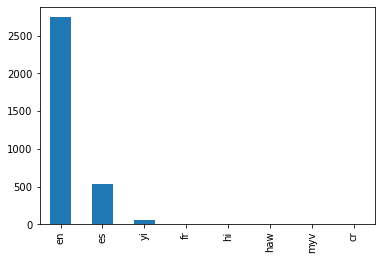

In [18]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots()
title_akas_df['language'].value_counts().plot(ax=ax, kind='bar')

4) PreDominantly English and Spanish which is expected from a region like US 

### Understanding the types variable 

In [19]:
title_akas_df['types'].value_counts()

imdbDisplay         969665
working              21173
alternative          18640
dvd                   2534
video                 2166
tv                    1106
festival              1039
original                 9
tvworking               4
tvvideo                 4
videoworking            3
festivalworking         1
dvdvideo                1
Name: types, dtype: int64

### Inference from analyzing title_akas_df table
1) Useful for filtering the table with region


2) Not a lot of useful information from the type variable because we have title type in title_basics_df table which gives us a better understanding. Similar logic for title


3) attributes could be ignored.


4) Dont find much value with language as majority are null and from the freq distribution it would be safe to conclude that the movie in the region of US would majorly be English or Spanish hence not a lot of useful information from there

# Analyzing the table title_basics_df

In [20]:
title_basics_df.describe()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,8691512,8691512,8691504,8691504,8691512,8691512,8691512,8691512,8691502
unique,8691512,11,4040222,4059774,11,256,97,864,2303
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,6501575,42486,42486,8359905,1119907,8603934,6336113,979155


1) Since every column row has a unique tconst it would be safe to do a inner join with title_akas_df.



The reason for the join is to filter the data by region

In [21]:
title_basics_df_1 = pd.merge(title_akas_df,title_basics_df, on='tconst',how ='inner')

In [22]:
title_basics_df_1 = title_basics_df_1.replace('\\N', np.NaN)

In [23]:
title_basics_df_1.describe(include= 'all')

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
count,1296435,1.296435e+06,1296435,1296435,3352,1016344,43352,1.296405e+06,1296435,1296435,1296435,1296435.0,1215613,33347,832671,1268602
unique,1219879,NaN,1003023,1,8,13,163,NaN,10,944741,962297,4.0,243,90,683,2110
top,tt0239195,NaN,Pilot,US,en,imdbDisplay,series title,NaN,short,Pilot,Pilot,0.0,2018,2017,60,"Comedy,Short"
freq,42,NaN,992,1296435,2744,969664,4262,NaN,424346,995,996,1197703.0,60358,2283,35480,82597
mean,NaN,2.412953e+00,NaN,NaN,NaN,NaN,NaN,6.942275e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.610360e+00,NaN,NaN,NaN,NaN,NaN,2.634812e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Ananlyzing Movie title Type

In [24]:
title_basics_df_1['titleType'].value_counts()

short           424346
movie           306249
tvEpisode       193723
video           171337
tvSeries         99653
tvMovie          42535
tvSpecial        21098
videoGame        16803
tvMiniSeries     15593
tvShort           5098
Name: titleType, dtype: int64

2) Will use titletype instead of types as it gives me better intuition of the kind of media streamed by the customers

#### Ananlyzing Movie/TV Series Start Year

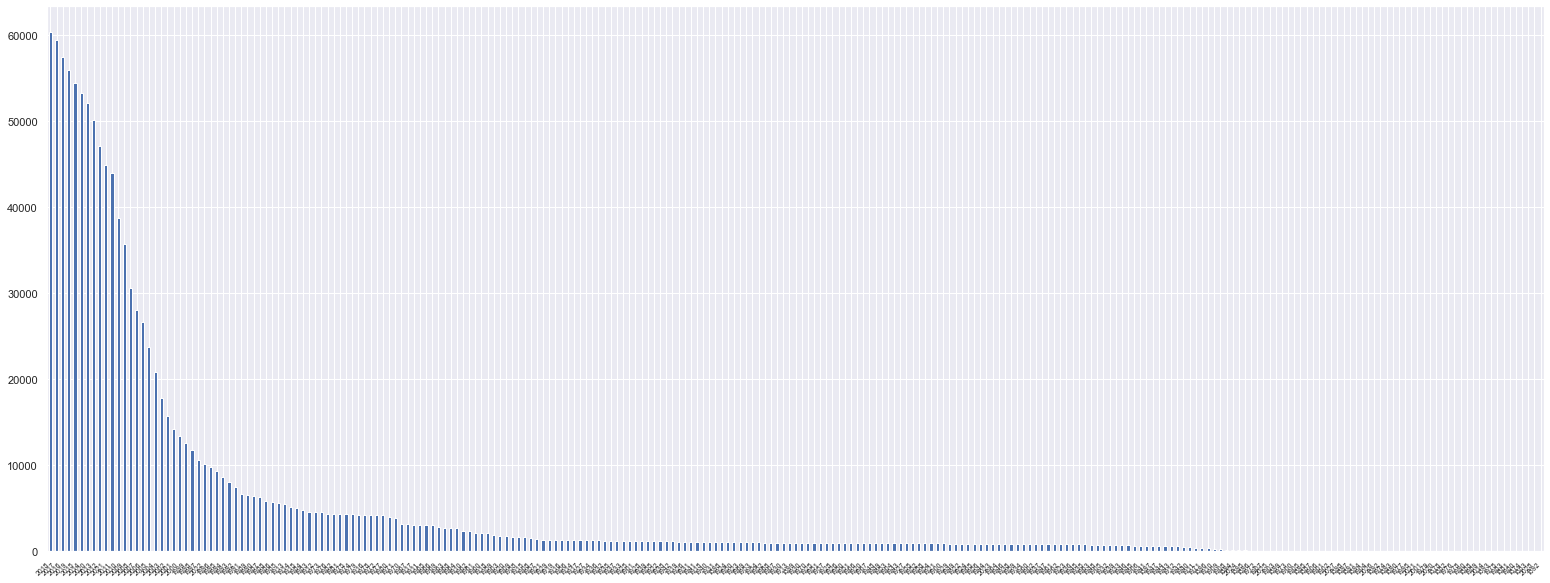

In [27]:
import matplotlib.pyplot as plt
import pandas

fig, ax = plt.subplots()
title_basics_df_1['startYear'].value_counts().plot(ax=ax, kind='bar')
sns.set(rc={'figure.figsize':(24.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=7)
plt.tight_layout()
plt.show()

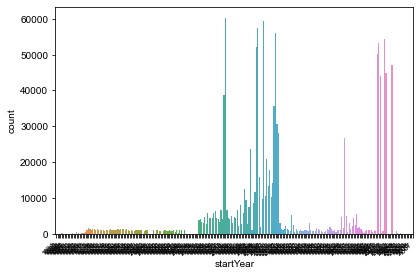

In [26]:



ax = sns.countplot(x="startYear",data=title_basics_df_1)
sns.set(rc={'figure.figsize':(21.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=7)
plt.tight_layout()
plt.show()

#### Ananlyzing Movie/Tv Series Run time

In [28]:
title_basics_df_1['runtimeMinutes'] = pd.to_numeric(title_basics_df_1['runtimeMinutes'])

In [29]:
title_basics_df_1['runtimeMinutes'].describe()

count    832671.000000
mean         50.875786
std          99.277161
min           0.000000
25%          13.000000
50%          40.000000
75%          84.000000
max       51420.000000
Name: runtimeMinutes, dtype: float64

In [30]:
title_basics_df_1[title_basics_df_1['runtimeMinutes'] > 165]['runtimeMinutes'].count()

13206

##### movies/tv series that go beyond 165mins make up for only 1% Data points so I might leave it as is for the moment

# Analyzing the table title_crew_df and title_principals_df and name_basics_df

In [257]:
title_principals_df.describe(include ='all')

,tconst,ordering,nconst,category,job,characters
count,10000000,1.000000e+07,10000000,10000000,1834382,4698658
unique,1344890,NaN,1365148,12,22868,1043680
top,tt10315920,NaN,nm0903436,actor,producer,"[""Self""]"
freq,10,NaN,4844,2581315,591601,567792
mean,NaN,4.908265e+00,NaN,NaN,NaN,NaN
std,NaN,2.816454e+00,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,2.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,5.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,7.000000e+00,NaN,NaN,NaN,NaN


In [31]:
title_crew_df = title_crew_df.replace('\\N', np.NaN)
title_principals_df = title_principals_df.replace('\\N', np.NaN)
title_name_basics_df = title_name_basics_df.replace('\\N', np.NaN)

#### Merging the crew table to get the directors and writers

In [32]:
title_basics_df_2 = pd.merge(title_crew_df,title_basics_df_1, on='tconst',how ='inner')

#### Merging the principals to get the job nconst and the category of the job of the individual

In [33]:
title_basics_df_3 = pd.merge(title_basics_df_2,
                             title_principals_df[['tconst','ordering','nconst','category','job','characters']],
                             on=['tconst','ordering'], how='left')

In [34]:
title_basics_df_3['category'].value_counts()

actor                  457411
actress                293254
self                   169424
director               103963
writer                  43929
producer                32042
composer                13102
cinematographer         12437
archive_footage         11115
editor                   6239
production_designer       642
archive_sound             181
Name: category, dtype: int64

#### Merging the name basics to get the titles an individual is known for. Left join because we do not want to loose the other important information 

In [35]:
title_basics_df_4 = pd.merge(title_basics_df_3,title_name_basics_df[['nconst','primaryName','primaryProfession','knownForTitles']],
                             on='nconst', how='left')

#### Creating a final table with the variables thought to be of somewhat importance. Further we would use algos to decide on those variables which are actually significant 

In [36]:
variables_df = title_basics_df_4[['tconst','directors','writers','titleType','primaryTitle','isAdult','startYear'
                                 ,'runtimeMinutes','genres','category','job','primaryProfession','knownForTitles']]

### Target Variable 

In [37]:
df = pd.merge(variables_df,title_ratings_df,
                             on='tconst', how='inner')

In [41]:
df.to_csv('data.csv')